# K-means Clustering

# k-Means Clustering

The $k$-means clustering algorithm partitions the observations into, as the name suggests, $k$ distinct clusters. It seeks to group data points based on their proximity to cluster centres, also called _centroids_. Consider a dataset of size $n$, $X= \{x_1,\cdots,x_n\}$ where each $x_i\in\mathbb R^p$ is a $p$-dimensional vector. We aim to partition these $n$ data points into $k$ distinct clusters $S=\{ S_1,\cdots, S_k\}$ in a way that the within-cluster sum of squares (WCSS) is minimised. This minimisation ensures that the data points within each cluster are as similar as possible, while clusters are as distinct to each other as possible.

The centroid of $\mu_j$ of the cluster $S_j$ for $j=1, \cdots, k$ is defined as the mean of all data points. That is,

$$
\mu_j = \frac{\sum_{i=1}^n 1_{x_i\in S_j} x_i}{\sum_{i=1}^n 1_{x_i\in S_j}}
$$

and thus for the within-cluster sum of squares we have

$$
WCSS = \sum_{i=1}^{n} \sum_{j=1}^{k} 1_{x_i\in S_j} ||x_i - \mu_j||^2
$$

where $||x_i - \mu_j||^2$ represents the squared Euclidean distance between data point $x_i$ and centroid $\mu_j$, quantifying the dissimilarity.

### Algorithm

1. Randomly choose $k$ data points and set them as centroids for $k$ clusters.
2. Assign each data point to the nearest centroid.
3. Recalculate the centroids as the mean of the points in their respective clusters.
4. Repeat the process until the centroids no longer change significantly or a maximum number of iterations is reached.


### Tuning the model

The algorithm's convergence is guaranteed, but it may settle into a local minimum of the WCSS, potentially leading to suboptimal clustering. The initial centroid selection plays a crucial role; different initialisations can yield vastly different results. Therefore, it is helpful to run the algorithm multiple times with varying initialisations to mitigate this issue.

Determining the optimal number of clusters, $k$, is another critical challenge. Methods like the elbow method or silhouette analysis can help for this task. The choice of Euclidean distance implicitly assumes that clusters are spherical and have similar variances. Deviations from these assumptions may necessitate the use of alternative distance metrics or clustering algorithms.

It is important to note that the $k$-means algorithm is vulnerable to outliers. Outliers in the dataset can significantly distort the centroids. The algorithm also struggles with clusters of varying densities and non-convex shapes. Extensions such as k-medoids, which uses medoids instead of means, and fuzzy c-means, which allows data points to belong to multiple clusters with varying degrees of membership, address some of these limitations. Also, the algorithm assumes that all features contribute equally, so feature scaling is important.

In [1]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Synthetic data

In [3]:
# Generate a sample dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

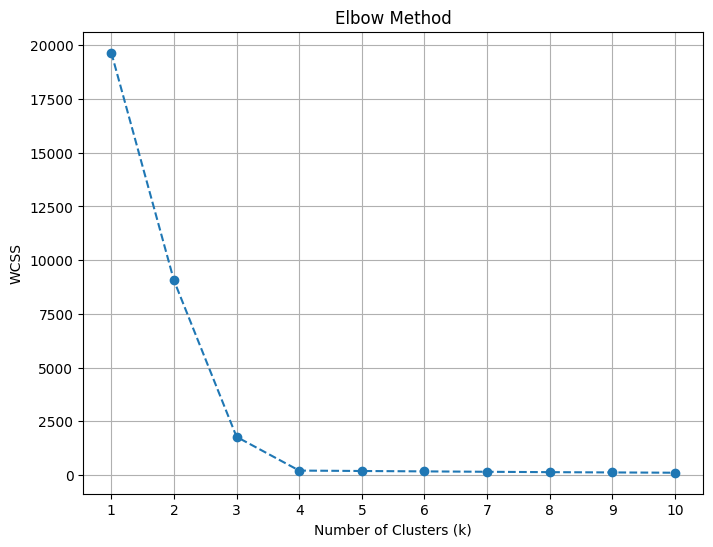

In [4]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

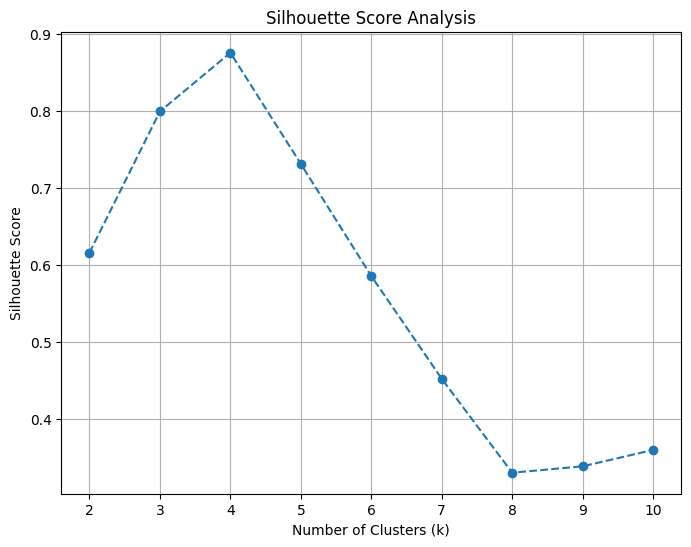

In [5]:
# Silhouette Score Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [6]:
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"The best k based on silhouette score is {best_k}")

The best k based on silhouette score is 4


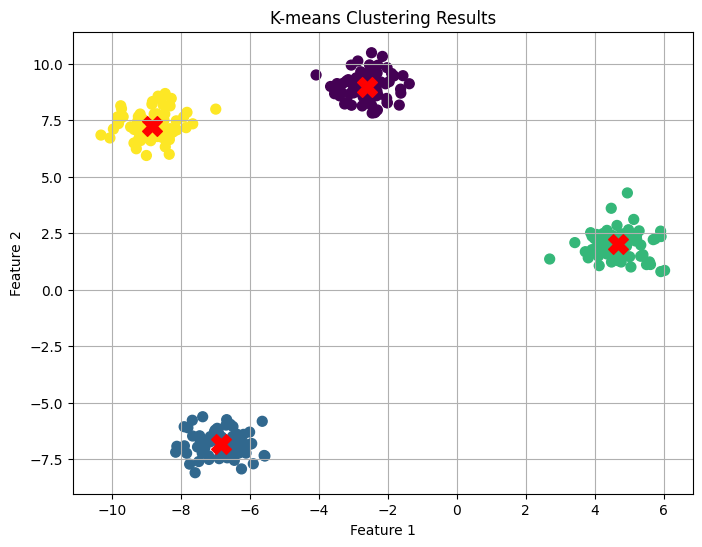

In [7]:
# K-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualise the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

#### Wine dataset

In [8]:
# Load the Wine dataset
wine = load_wine()
X = wine.data

# Scale the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

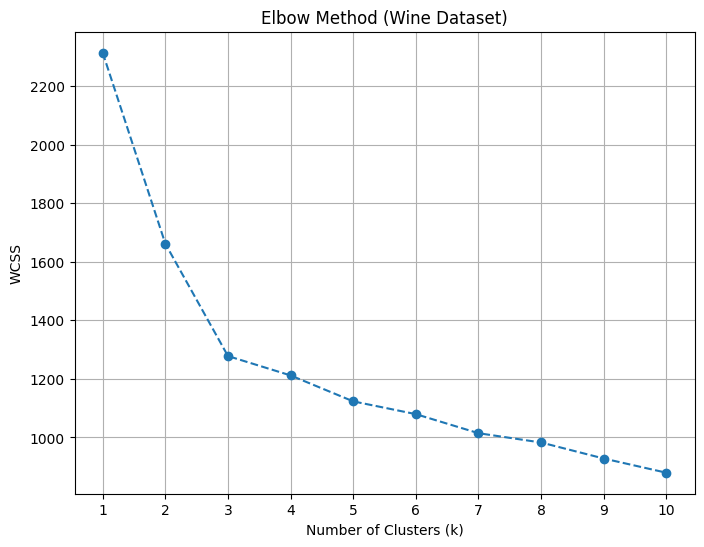

In [9]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Wine Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


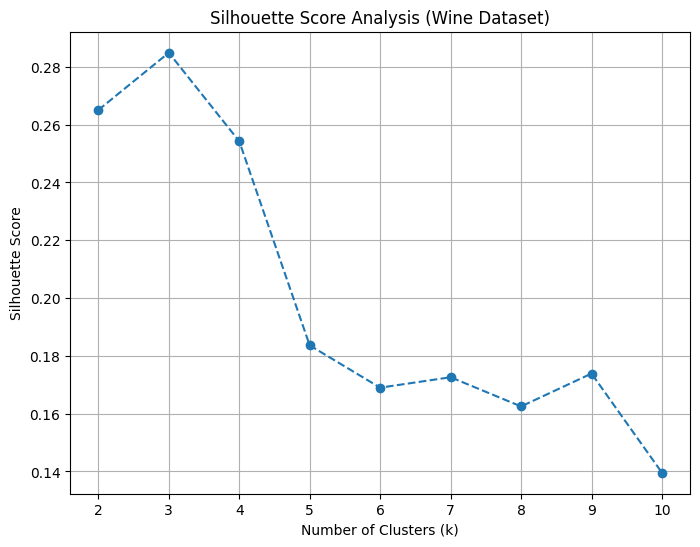

In [10]:
# Silhouette Score Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Analysis (Wine Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [11]:
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"The best k based on silhouette score is {best_k}")

The best k based on silhouette score is 3


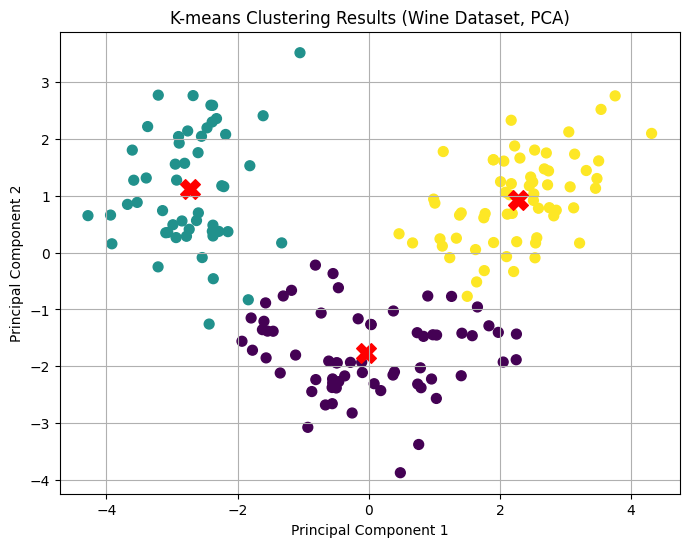

In [12]:
# K-means clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Visualise the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200)
plt.title('K-means Clustering Results (Wine Dataset, PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()